<center>
<img src="https://i.ibb.co/Ycs11Fg/meme.jpg">
</center>

# Андан на экономе: домашнее задание 3
## Задача классификации

**ФИО:** _Григорян Тигран Артурович_


## Общая информация


__Дата выдачи:__ 14.04.2023

__Мягкий дедлайн:__ 23:59MSK 07.05.2023

__Жесткий дедлайн:__ 23:59MSK 14.05.2023

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 100 баллов. За каждый день просрочки после мягкого дедлайна снимается 10 баллов. После жёсткого дедлайна работы не принимаются. Даже при опозданиии на одну секунду. Сдавайте работы заранее.

Мягкий дедлайн можно отодвинуть без потери баллов на 1,2 или 3 дня. Суммарно для откладывания в запасе есть три дня. Можно отодвинуть один дедлайн на три дня, а можно три дедлайна подвинуть на один день. Распоряжаться этими днями студент может как угодно. Жёсткий дедлайн, при этом, не меняется. Если такое произошло, нужно сообщить о сдвиге при сдаче работы.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Любой из студентов может быть вызван на защиту любого домашнего задания. В таком случае итоговая оценка студента определяется в результате защиты.

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено. 

> Выводы должны быть релевантными. Не забывайте их писать. Если в вопросе требуется ответ словами, а его нет, вы будете терять довольно много баллов.

> Фиксируйте все seed'ы, random_state'ы и тд - ваш код должен быть воспроизводим с теми же результатами.

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл сдаётся в anytask.

## Импорт необходимых библиотек 

Импортируйте все используемые библиотеки здесь.

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.metrics import roc_curve, confusion_matrix, average_precision_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Отключение некоторых лишних предупреждений
import warnings
warnings.filterwarnings("ignore")

## Задача 

В данном задании вам необходимо построить предсказательную модель, определяющую пол клиента по его банковским транзакциям.

Вам доступны 2 файла:
* __transaction.csv__ - файл с транзакциями, колонки:
    * user_id - целочисленный идентификатор пользователя
    * dt - дата и время совершения транзации, принцип кодирования: "DAY TIME"
        * DAY - порядковый день транзации с начала сбора данных
        * TIME - время в формате hh:mm:ss
    * type - тип (категория) совершаемой транзакции
    * value - сумма транзакции
    
* __gender.csv__ - файл с данными о полах клиентов.
    * user_id - целочисленный идентификатор пользователя
    * gender - целевая переменная, закодированная лейблами 0 и 1. Это сделано:
        * a) для удобства
        * б) для избежания холиваров о правильности исходных меток 

Но если вы вдруг захотите похоливарить о том, что метки только две - то заметьте, что о полноте данных мы тоже не утверждаем.

# Часть 1: минималочка [макс 20 баллов]

В этой части мы с вами попробуем построить самую простую модель для предсказания.

Как мы с вами увидим: главная сложность - правильная подготовка данных. В таких задачах то, как именно вы преобразуете данные для обучения модели и будет во много определять её качество.

В этой части мы сделаем простое преобразование данных путём простой агрегации данных о величине транзакций. 

## Загрузка данных [5 баллов] 

Скачайте данные для задачи с Яндекс.Диска:
https://disk.yandex.ru/d/DGy6bbLaMZmrQg.

Загрузите файлы с транзакциями и целевой меткой в pd.DataFrame.

__Внимание__: у файла transactions.csv колоночный разделитель - точка с запятой ";"

In [2]:
# подгружаем датасет с гендерами клиентов

df_gender = pd.read_csv('data/gender.csv', sep=',')
df_gender

,user_id,gender
0,6740969,1.0
1,36599781,0.0
2,91453656,1.0
3,17431962,1.0
4,72568668,1.0
...,...,...
8395,93715144,1.0
8396,51502229,0.0
8397,77655748,1.0
8398,87819773,1.0


In [3]:
# подгружаем датасет с инфой о том что, из какой категории и во сколько покупал тот или иной клиент  

df_tr = pd.read_csv('data/transactions.csv', sep=';')
df_tr

,user_id,dt,type,value
0,39026145,0 10:23:26,"Звонки с использованием телефонов, считывающих...",2695.099
1,39026145,6 07:08:31,"Звонки с использованием телефонов, считывающих...",2358.212
2,39026145,8 07:06:10,"Звонки с использованием телефонов, считывающих...",2807.395
3,39026145,11 08:49:03,"Звонки с использованием телефонов, считывающих...",2695.099
4,39026145,11 14:12:08,"Звонки с использованием телефонов, считывающих...",2695.099
...,...,...,...,...
2282462,71902723,290 15:12:09,Агенты и менеджеры по аренде недвижимости,2133.620
2282463,71942984,248 00:00:00,Агенты и менеджеры по аренде недвижимости,1870.848
2282464,71942984,375 00:00:00,Агенты и менеджеры по аренде недвижимости,2466.016
2282465,74289663,27 00:00:00,Агентства по аренде автомобилей,1445.831


## Подготовка данных [10 баллов] 

Для данной задачи необходимо как-то собрать данные для каждого пользователя в один вектор (строку таблицы). Сейчас, как вы можете увидеть, в таблице с данными одному пользователю может соответствовать много строк (каждая операция - отдельная строка).

Таким образом, необходима агрегация данных - это можно сделать множеством разных способов.

### Агрегация 

Произведите простую агрегацию данных и для каждого пользователя в качестве признаков получите сумму, среднее и стандартное отклонение величины его транзакций. 

Так же добавите для каждого пользователя колонку с таргетом.

По итогу вы должны получить таблицу с колонками:
* user_id
* value_sum
* value_mean
* value_std
* gender

In [4]:
#группируем датасет по столбцу user_id, применив необходиыме функции для вычесления показателей

df_tr1 = df_tr.groupby('user_id').agg(['sum', 'mean', 'std'])

#присоедини то, что получили выше к датасету с гендерами

df_tr2 = df_gender.join(df_tr1, on='user_id')


# называем колонки и ставим их в правильном порядке

df_tr2.rename(
    columns={('value',  'sum'): 'value_sum', 
             ('value', 'mean'): 'value_mean', 
             ('value',  'std'): 'value_std'}, 
    inplace=True
)

cols = ['user_id', 'value_sum', 'value_mean', 'value_std', 'gender']
df_tr2 = df_tr2[cols]

df_tr2

,user_id,value_sum,value_mean,value_std,gender
0,6740969,996602.640,2171.247582,718.691164,1.0
1,36599781,2227630.566,2175.420475,645.511317,0.0
2,91453656,137064.806,2363.186310,684.686030,1.0
3,17431962,1112047.619,2118.185941,717.894125,1.0
4,72568668,533183.043,1974.752011,745.930038,1.0
...,...,...,...,...,...
8395,93715144,115187.587,2258.580137,582.322640,1.0
8396,51502229,588940.268,2126.138152,648.121314,0.0
8397,77655748,1997426.562,2432.919077,515.688715,1.0
8398,87819773,860945.168,2084.612998,737.384287,1.0


In [5]:
# заполняет пустые ячейки нулями

df_tr2 = df_tr2.fillna(0)

### Отложенная выборка 

Получите полный список пользователей и разделите их на два списка:
* тренировочный список пользователей (80%)
* тестовый список пользователей (20%)

__Важное замечание__: Далее во всех пунктах, где вам нужно провалидировать (оценить) получившуюся модель исползуйте данные только для этих тестовых пользователей.

Обучать все модели, естественно, нужно только на данных пользователей из обучающего списка.

In [6]:
# делим на выборки
training_data, testing_data = train_test_split(df_tr2, test_size=0.2, random_state=1)

# глянем на количество элементов в выборках
print(f"quantity of training examples: {training_data.shape[0]}")
print(f"quantity of testing examples: {testing_data.shape[0]}")

quantity of training examples: 6720
quantity of testing examples: 1680


Для нашей задачи получите признаки и целевые метки обучающей и тестовой выборки. 

In [7]:
# разделяем У на трейн и тест

y_train = training_data['gender'].to_numpy()
y_test = testing_data['gender'].to_numpy()

# разделяем Х на трейн и тест

X_train = training_data.drop('gender', axis=1).to_numpy()
X_test = testing_data.drop('gender', axis=1).to_numpy()

_на всякий случай проверим количество 1 и 0, дабы не было сильного дизлабанса и не пришлось балансировать по колонке 'gender'_

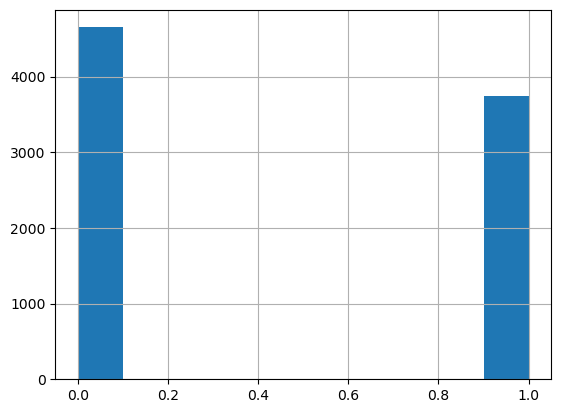

In [8]:
df_tr2['gender'].astype(int).hist();

## Обучение и оценка модели [5 баллов] 

Обучите модель логистической регрессии с дефолтными параметрами.

Получите предсказания вероятностей первого класса.

In [9]:
# обучили модель логистической регрессии

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5375

In [10]:
# получаем предсказангие вероятностей первого класса с помощью predict_proba()

p_pred = model.predict_proba(X_test)[:, 1]
p_pred

array([0.46236167, 0.4563562 , 0.49828521, ..., 0.49068333, 0.45112885,
       0.41960675])

In [11]:
# предсказываем y

t = 0.5 # задали порог
y_pred = 1*(p_pred >= t) # отсекаем по порогу 
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [12]:
# глянем на матрицу ошибок, чтобы примерно понимать, что нас ждет в метриках

confusion_matrix(y_test, y_pred)

array([[890,  15],
       [762,  13]], dtype=int64)

### Валидация 

Посчитайте ROC_AUC, accuracy, precision, recall для получившихся предсказаний.

Для метрик, для которых необходимы метки классов, а не вероятности - используйте порог 0.5.

Далее при оценки других моделей приводите эти же метрики (если явно не указано иное).

In [13]:
# высчитываем все необходимые показатели через встроенные в библиотеку функции

roc_auc = roc_auc_score(y_test, p_pred)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

print(f'ROC-AUC = {roc_auc}', f'Accuracy = {accuracy}', f'Precision = {precision}', f'Recall = {recall}', sep='\n')

ROC-AUC = 0.48874710390304765
Accuracy = 0.5375
Precision = 0.4642857142857143
Recall = 0.016774193548387096


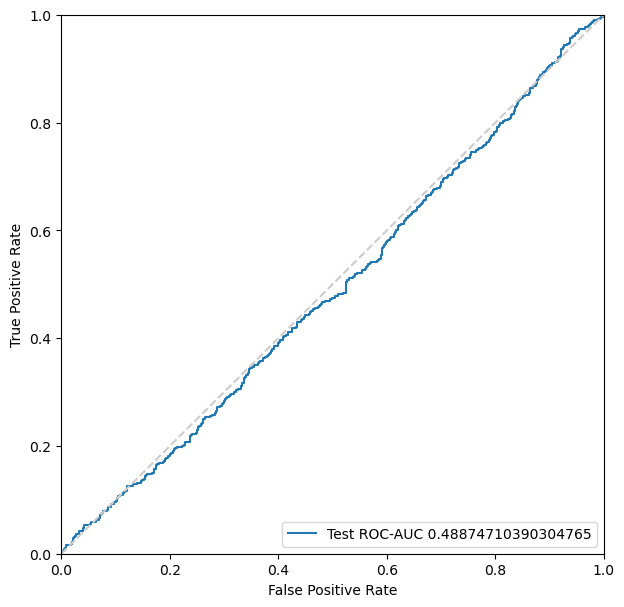

In [14]:
# позаимствуем код у достопочтенного Филиппа, дабы наделать красоты

def roc_auc_pic(y_test, y_pred):    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, p_pred)
    roc_auc_test = roc_auc_score(y_test, p_pred)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test, tpr_test, label='Test ROC-AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.8, 0.8, 0.8))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');
    
roc_auc_pic(y_test, p_pred)

### Вывод

Как вы оцениваете качество получившейся модели и возможные причины такого качества?

__Ваш вывод:__ _модель никакая, надо оптимизировать пока не дооптимизируем. причиной, почему модель дала настолько плохие результаты, может быть то, что мы выбрали неудачные показатели, на которые сложно опираться при прогнозировании. То есть, я хочу сказать, что то совокупное количество денег, которое человек потратил на покупки и то какое стандартное отклонение будет у его трат никак не говорит о его половой принадлежности. Проилюстрирована также ROC-кривая, по результам которой можно судить о том, что данные никуда не годятся, и нужно что-то менять, чем мы и занялись в последующих пунктах. Другие показатели также некудышные_

# Часть 2: мб сделаем что-то более серьёзное? [макс 20 баллов]

Давайте попробуем улучшить качество решения задачи за счёт другого метода подготовки данных.

Ранее мы использовали простое преобразование, когда каждый клиент описывался только 3 значениями.
Давайте сделаем что-то более сложное и попробуем добавить больше данных о клиенте для модели.

## Подготовка данных [15 баллов]

Воспользуемся тем, что каждая транзакция у нас имеет свой тип - это уж точно более информативно, чем агрегация по всем транзакциям.

Создайте сводную таблицу, где для каждого клиента (строка) будут указаны его суммарные траты на каждую категорию (столбец). Таким образом, вы должны получить таблицу с числом строк равным количеству клиентов и числом столбцов - количеству категорий трат. Каждая ячейка должна содержать суммарные траты данного клиента в данной категории.

__Подсказка__: у DataFrame есть полезный метод `pivot_table`.

In [15]:
# получили необходимую новую табличку, к которой потом присобачим колонку с гендерами и на ней снова обучим модель

df_pivot = pd.pivot_table(df_tr, values='value', index='user_id',
                       columns='type', aggfunc=np.sum, fill_value=0)

# запоминаем все категории, далее они нам понадобятся
features = df_pivot.columns.to_list()

df_pivot

type,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,Агенты и менеджеры по аренде недвижимости,...,"Фотостудии, фотолаборатории","Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование
user_id,,,,,,,,,,,,,,,,,,,,,
22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0


In [16]:
# добавили колонку с гендером, чтобы по ней взять y для трейн и теста

df_pivot_GenderJoined = df_pivot.merge(df_gender, on='user_id')
df_pivot_GenderJoined

,user_id,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
0,22899,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
1,27914,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
2,28753,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,31385,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,38084,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,99953525,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
8352,99967537,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0
8353,99988578,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4267.24,0.0,0.0,0.0,0.0,1.0
8354,99991245,0.0,0.0,0.0,4446.915,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0


## Обучение и валидация модели [5 баллов]

Аналогично предыдущей части разделите данные на обучающую и тестовую выборку (80%/20%), обучите модель на дефолтных параметрах и оцените качество.

In [17]:
# делаем все тоже самое, что и раньше только для нового датасета

training_data_new, testing_data_new = train_test_split(df_pivot_GenderJoined, test_size=0.2, random_state=1)

# разделяем У на трейн и тест

y_train_new = training_data_new['gender'].to_numpy()
y_test_new = testing_data_new['gender'].to_numpy()

# разделяем Х на трейн и тест

X_train_new = training_data_new.drop('gender', axis=1).to_numpy()
X_test_new = testing_data_new.drop('gender', axis=1).to_numpy()

In [18]:
# обучили модель логистической регрессии для нового датасета

model.fit(X_train_new, y_train_new)
model.score(X_test_new, y_test_new)

0.6572966507177034

In [19]:
# получаем предсказангие вероятностей первого класса с помощью predict_proba()

p_pred_new = model.predict_proba(X_test_new)[:, 1]
p_pred_new

array([0.48479677, 0.38280379, 0.48634638, ..., 0.36910965, 0.4295377 ,
       0.999096  ])

In [20]:
# после того как улучшили качество данных в показателях уже не одни нули и из этого может что-то получится

y_pred_new = 1*(p_pred_new >= t) 
y_pred_new

array([0, 0, 0, ..., 0, 0, 1])

In [21]:
# глянем матрицу ошибок. заметим, что она несколько изменилась, что обязательно отразиться на метриках качества

confusion_matrix(y_test_new, y_pred_new)

array([[800, 132],
       [441, 299]], dtype=int64)

In [22]:
# высчитываем все необходимые показатели через встроенные в библиотеку функции, но уже для нового датасета

roc_auc = roc_auc_score(y_test_new, p_pred_new)

accuracy = accuracy_score(y_test_new, y_pred_new)

precision = precision_score(y_test_new, y_pred_new)

recall = recall_score(y_test_new, y_pred_new)

print(f'ROC-AUC = {roc_auc}', f'Accuracy = {accuracy}', f'Precision = {precision}', f'Recall = {recall}', sep='\n')

ROC-AUC = 0.7220914047094305
Accuracy = 0.6572966507177034
Precision = 0.6937354988399071
Recall = 0.40405405405405403


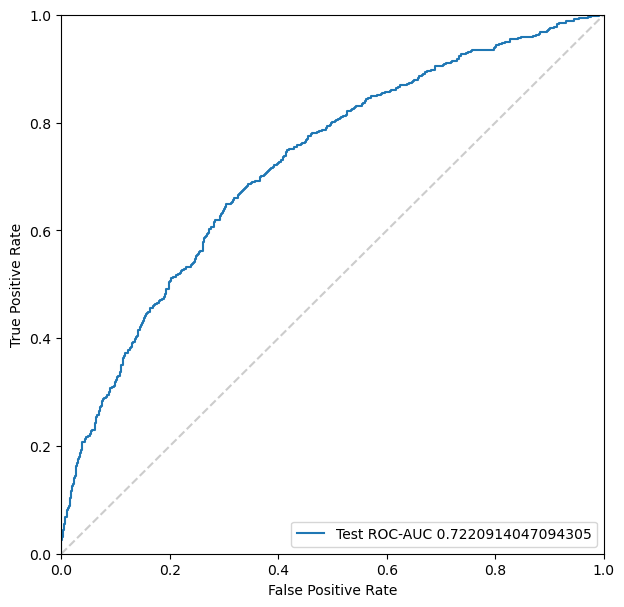

In [23]:
# вновь пользуемся кодом того, чье имя нельзя произносить вслух, для визуализации нашей кривой

def roc_auc_pic_new(y_test_new, y_pred_new):    
    fpr_test_new, tpr_test_new, thresholds_test_new = roc_curve(y_test_new, p_pred_new)
    roc_auc_test_new = roc_auc_score(y_test_new, p_pred_new)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test_new, tpr_test_new, label='Test ROC-AUC {0}'.format(roc_auc_test_new))
    plt.plot([0, 1], [0, 1], '--', color=(0.8, 0.8, 0.8))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');
    
    
roc_auc_pic_new(y_test_new, p_pred_new)

### Вывод 

Изменилось ли качество модели? Почему?

__Ваш вывод:__ _качество данных улучшилось, теперь мы обучаем нашу модель на основе категорий, по которым легче определить какого пола потребитель. Из-за чего в частности все наши показатели улучшились, что не может не радовать. Это лучше, чем в примере выше, но можно сделать еще лучше. В любом случае, сложно будет избавиться от мужчин, которые делают покупки "как женщины" или наоборот, что также будет сбивать нашу модель_

# Часть 3: что мы всё про данные? Давайте про модель 
# [макс 30 баллов]

Ранее мы работали только над подготовкой обучающей выборки. Давайте теперь попробуем изменить модель, чтобы добиться наилучшего качества. 

Входные данные для этой части - выборка с предыдущей.

## Нормирование данных [5 баллов] 

Как мы знаем, линейные модели любят нормированные данные.

Приведите значения всех признаков в отрезок [0, 1]

__Замечание__: если вы используете метод, который удаляет информацию о названиях колонок - сохраните эти названия в отдельную переменную, вам это потом может понадобиться.

In [24]:
# приводим все к отрезку [0, 1] с помощью MinMaxScaler()

MinMax = MinMaxScaler()
columns = df_pivot_GenderJoined.columns.tolist()

# создадим новый датасет с отнормированными данными

df_scaled = pd.DataFrame(MinMax.fit_transform(df_pivot_GenderJoined), columns = columns)

# так как у нас 'user_id' тоже отнормировалось вернем этой колонке прежний вид

df_scaled['user_id'] = df_pivot_GenderJoined['user_id']
df_scaled

,user_id,"Авиалинии, авиакомпании","Авиалинии, авиакомпании, нигде более не классифицированные",Автобусные линии,Автозапчасти и аксессуары,Автоматизированные бензозаправки,Автомойки,Автошины,"Агентства по автотранспортным перевозкам, местные/дальные автогрузоперевозки, компании попереезду и хранению, местная доставка",Агентства по аренде автомобилей,...,"Химикалии и смежные вещества, не классифицированные ранее",Химчистки,Ценные бумаги: брокеры/дилеры,Центры здоровья,"Цифровые товары, игры",Школы — бизнес и секретарей,Штрафы,"Штучные товары, галантерея и другие текстильные товары",Электрические части и оборудование,gender
0,22899,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
1,27914,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
2,28753,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,31385,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,38084,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8351,99953525,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8352,99967537,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0
8353,99988578,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.058444,0.0,0.0,0.0,0.0,1.0
8354,99991245,0.0,0.0,0.0,0.010513,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0


In [25]:
# делаем разбиение по аналогии

training_data_scaled, testing_data_scaled = train_test_split(df_scaled, test_size=0.2, random_state=1)

# разделяем У на трейн и тест

y_train_scaled = training_data_scaled['gender'].to_numpy()
y_test_scaled = testing_data_scaled['gender'].to_numpy()

# разделяем Х на трейн и тест

X_train_scaled = training_data_scaled.drop('gender', axis=1).to_numpy()
X_test_scaled = testing_data_scaled.drop('gender', axis=1).to_numpy()

## Подбор параметров [15 баллов]

Подберите наилучшие параметры для модели логистической регрессии. Важные уточнения:

* используйте перебор по сетке
* в качестве метрики используйте ROC AUC
* для оценки параметров делайте кросс-валидацию на 4 фолдах

__Замечание__: у логистической регрессии множество доступных значений для некоторых параметров зависит от метода оптимизации (solver). Например, lbfgs-алгоритм не подерживает l1-регуляризацию.

Поэтому действуйте шагами: сначала подберите solver, а потом уже переберите доступные для него параметры.

_пару комментов решил добавить, почему я выбрал именно такие значения в параметры_

_чтобы код не запускался 100500 лет, решил ограничиться буквально несколькими вариантами параметров для дальнейшего поиска по сетке (да, знаю, что он все равно довольно долго запускается, но из всего, что перепробовал это самый быстрый вариант)_

- _для метода оптимизации_ __(_'solver'_)__ _я остановился на_ __'_liblinear_', '_sag_'__ _и_ __'_saga_'__. _Добавил именно эти метод, так как_ ___'liblinear'___ _работает как с гребанной регуляризацией_ ___(Ridge, L1)___, _так и с лассо_ ___(Lasso, L2)__, __'sag'___ _только с_ ___L2___, _а_ __'_saga_'__ _в случае, когда используется и тот и другой метод регуляризации_ ___(elasticnet)___
- _добавил также все три вида регуляризации __(penalty)__ __('l1', 'l2', 'elasticnet')___
- _коэффициент регуляризации ___(C)___ я натыкал наобум_ (◕‿◕)

In [26]:
# делаем, что велено выше и пилим поиск по сетке

param_grid = {
    'solver': ['liblinear', 'sag', 'saga']
}

searcher = GridSearchCV(
    model, param_grid, 
    scoring='roc_auc', cv=4
)

searcher.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'solver': ['liblinear', 'sag', 'saga']},
             scoring='roc_auc')

In [27]:
# получили наш solver

print(searcher.best_params_)

{'solver': 'liblinear'}


In [28]:
# теперь ищем еще несколько параметров
params_with_solver = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.5, 1, 1.5]
}

searcher_with_solver = GridSearchCV(
    model, params_with_solver, 
    scoring='roc_auc', cv=4
)

searcher_with_solver.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 1.5],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [29]:
print(searcher_with_solver.best_params_)

{'C': 1.5, 'penalty': 'l1', 'solver': 'liblinear'}


Оцените качество лучшей модели на тестовых данных аналогично предыдущим задачам.

In [30]:
# подставляем новые значения

searcher_with_solver.score(X_test_scaled, y_test_scaled)

0.8081501565943625

In [31]:
# считаем метрики

p_pred_scaled = searcher_with_solver.predict_proba(X_test_scaled)[:, 1]

y_pred_scaled = 1*(p_pred_scaled >= t) 

roc_auc = roc_auc_score(y_test_scaled, p_pred_scaled)

accuracy = accuracy_score(y_test_scaled, y_pred_scaled)

precision = precision_score(y_test_scaled, y_pred_scaled)

recall = recall_score(y_test_scaled, y_pred_scaled)

print(f'ROC-AUC = {roc_auc}', f'Accuracy = {accuracy}', f'Precision = {precision}', f'Recall = {recall}', sep='\n')

ROC-AUC = 0.8081501565943625
Accuracy = 0.722488038277512
Precision = 0.7816326530612245
Recall = 0.5175675675675676


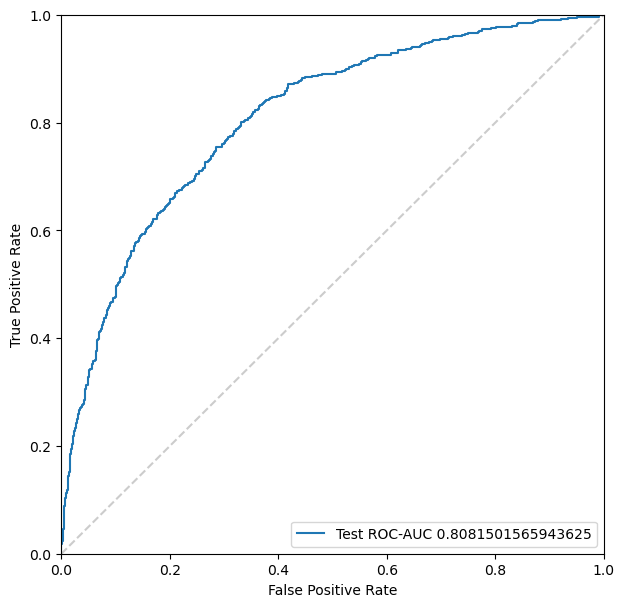

In [32]:
# вновь пользуемся кодом того, чье имя нельзя произносить вслух, для визуализации нашей кривой

def roc_auc_pic_new(y_test_scaled, y_pred_scaled):    
    fpr_test_new, tpr_test_new, thresholds_test_new = roc_curve(y_test_scaled, p_pred_scaled)
    roc_auc_test_new = roc_auc_score(y_test_scaled, p_pred_scaled)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test_new, tpr_test_new, label='Test ROC-AUC {0}'.format(roc_auc_test_new))
    plt.plot([0, 1], [0, 1], '--', color=(0.8, 0.8, 0.8))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');
    
    
roc_auc_pic_new(y_test_scaled, p_pred_scaled)

Получилось ли добиться лучше качества при подборе параметров?
Почему так? 

Для чего мы использовали одновременно кросс-валидацию и отложенную тестовую выборку?

__Ваш вывод__: _качество значительно улучшилось, так как теперь, мы нашли наилучшие параметры и уже с ними обучили нашу модель. для того, что объективно оценить нашу модель необходимо было отделить тестовую выборку, дабы впоследствии не опасаться за то, что данные из тестовой выборки попадутся при выборе параметров нашей модели, а этого быть не должно_

## Подбор отсечения [5 баллов]

Ранее мы работали или с вероятностями из модели или с метками, полученных при отсечении по веростности с порогом 0.5.

Стоит сказать, что порог 0.5 для разделения классов не всегда самый лучший. Часто нам нужно так подобрать порог, чтобы удовлетворить наши требования по точности и полноте.

Давайте подберём порог, который максимизирует F_beta меру при условии, что нам полнота в 5 раз важнее точности.

Вычислите наилучший порог и нарисуйте график зависимости этой метрики от порога разделения.

In [35]:
# значение beta для F-бета меры. Так как полнота в 5 раз важнее точности -> мы получаем F-5 меру
beta = 5 

# создадим пустые листы для датасета, который будем визуализировать
t_score = []
f_score = []

# предсказываем вероятность первого класса 
p_pred = searcher_with_solver.predict_proba(X_test_scaled)[:, 1]

# Инициализация переменных
best_threshold = 0
best_fbeta_score = 0

# Перебор порогов от 0 до 1 с шагом 0.01
for threshold in range(0, 100):
    threshold /= 100
    
    #добавили значения порогая, для дальнейшей визуализации
    t_score.append(threshold)
    
    # ищем метки классов, как в примерах выше
    y_pred = (p_pred > threshold).astype(int)
    
    # вычислили f-5 меру по формуле 
    precision = precision_score(y_test_scaled, y_pred)
    recall = recall_score(y_test_scaled, y_pred)
    fbeta = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)
    
    # добавляем значение f-меры в лист для дальнейшей визуализации
    f_score.append(fbeta)
    
    # Обновление лучшего порога и f-меры
    if fbeta > best_fbeta_score:
        best_fbeta_score = fbeta
        best_threshold = threshold

# Использование лучшего порога для предсказания меток классов
y_pred = (p_pred > best_threshold).astype(int)

print(f'Лучший порог = {best_threshold}')
df_fbeta = pd.DataFrame()
df_fbeta['F-5'] = f_score
df_fbeta['t'] = t_score

Лучший порог = 0.0


,F-5,t
0,0.953797,0.00
1,0.952149,0.01
2,0.950179,0.02
3,0.949784,0.03
4,0.948915,0.04
...,...,...
95,0.075655,0.95
96,0.061678,0.96
97,0.049086,0.97
98,0.039286,0.98


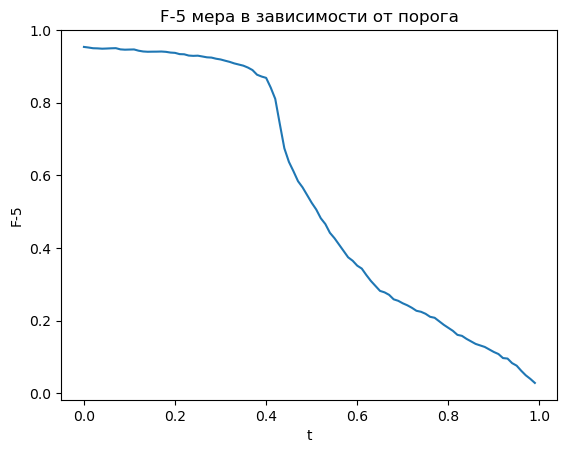

In [36]:
# изобразим на графике то, как изменяется f-мера в зависимости от порога
# можем заметить, что максимальное значение f-мера принимает при минимальном пороге (равном 0), что довольно очевидно
# заметим также, что после порога в 0.42 начинает резкий спуск, из-за чего можно использовать это значение в 4 части

sns.lineplot(df_fbeta, x='t', y='F-5').set(title='F-5 мера в зависимости от порога')
df_fbeta['F-5'].max()
plt.xlabel('t')
plt.ylabel('F-5');

## Интерпретация модели [5 баллов]

Часто нам хочется интерпритировать предсказания модели - понять, как наши признаки влияют на её ответ.
В случае сложных моделей сделать это не просто - чем сложнее модель, тем более сложные закономерности она извлекает и тем тяжелее нам их понять.

Но в случае логистической регресии это просто сделать, посмотрев на её обучаемые параметры (вспоминайте!).

Получите список признаков, которые увеличивают вероятность метки 0.
Аналогично для метки 1.

In [37]:
# получаем коэффициенты модели
coef = model.coef_[0]

# создаем список категорий товаров и их весов
# здесь мы использовали список категорий товаров, который мы создали выше
features_weights = list(zip(features, coef))

# сортируем список по убыванию весов
sorted_features_weights = sorted(features_weights, key=lambda x: x[1], reverse=True)

# получаем список признаков, которые увеличивают вероятность метки 1
top_features = [feature for feature, weight in sorted_features_weights if weight > 0]

print(*top_features[:11], sep='\n')

Стоматологическое/лабороторное/медицинское/офтальмологическое стационарное оборудование и устройства
Магазины спорттоваров
Розничная продажа стекла, красок и обоев
Транспортировка — пригородные и локальные сезонные транспортные средства, включая электрички
Готовая женская одежда
Автоматизированные бензозаправки
Лимузины и такси
Генеральные подрядчики по вентиляции, теплоснабжению, и водопроводу
Магазины игрушек
Мужская одежда и аксессуары, включая одежду для мальчиков
Беспошлинные магазины Duty Free


In [38]:
# тут все делаем по аналогии только уже для метки 0
sorted_features_weights = sorted(features_weights, key=lambda x: x[1])

top_features = [feature for feature, weight in sorted_features_weights if weight < 0]

print(*top_features[:11], sep='\n')

Ассоциации — гражданские, социальные и братские
Магазины мужской и женской одежды
Прямой маркетинг — торговые точки подписки
Ремонт бытовой техники, ремонт электроприборы
Магазины открыток, подарков, новинок и сувениров
Прямой маркетинг — входящий телемаркетинг
Оптика, оптические товары и очки
Общий ремонт
Магазины по продаже часов, ювелирных изделий и изделий из серебра
Различные продовольственные магазины — рынки, магазины со спец-ассортиментом, продажа полуфабрикатов, фирменных блюд, продажа с помощью торговых автоматов
Товары недлительного пользования, не классифицированные ранее


# Часть 4: ва-банк / пространство для творчества [макс 30 баллов]

Добейтесь максимального качества, больше качество - больше баллов.

Стратегия подготовки данных и обучения модели на ваше усмотрение.

Условия:
* Оценка на отложенной тестовой группе пользователей, использовавшейся в прошлых пунктах (20%)
* В качестве метрики используйте ROC_AUC

__Замечание__: 

Ответа на вопрос "какое нужно качество для максимального балла?" не будет.

Используйте все свои знания, чтобы добиться наилучшего результата.

_воспользуемся новым найденым порогом в 0.42_

_попробуем немного пойти дальше ныне изученного материала и использовать случайные леса.
дабы не было лишних вопрос, попытаюсь объяснить, как я понимаю механизм работы этого метода. случайный лес состоит из большого количества древ решений, которые упоминалось также на тервере в начале года, из-за чего долго на них останавливаться не буду, добавлю лишь, что правило, по которому будет производится отбор называется "узлом", а варианты исхода "листьями". В ходе нахождения параметров, мы прописываем максимальную глубину, число объектов в листьях, количество деревьев. в случае, когда мы используем большое количество такого рода деревьев результаты получаются лучше. проблемой может стать переобучение моделей_ 

_посмотрим как будут меняться результаты по отношению к результатам логистической регрессии. все будем делать по аналогии: сначала с изначальными данными, потом по отнормированным категориям, а после уже найдем оптимальные параметры с помощью GreadSearch._

ROC-AUC = 0.551182320441989
Accuracy = 0.5285714285714286
Precision = 0.49075081610446136
Recall = 0.5819354838709677


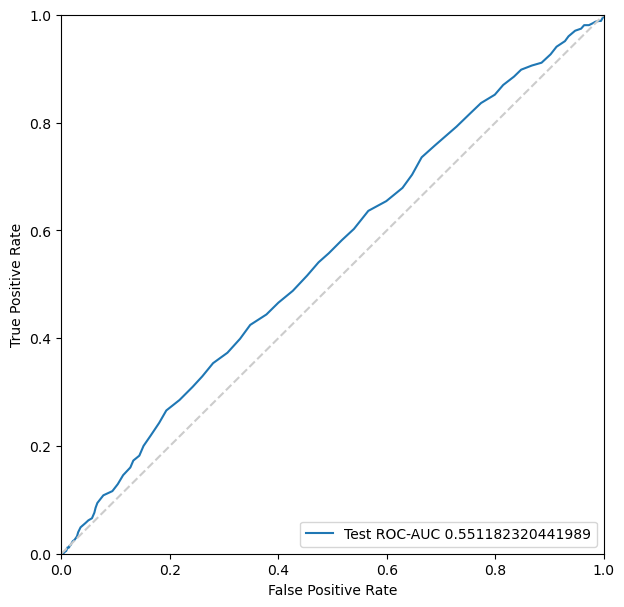

In [39]:
# для начала попробуем сделать все тоже самое что в самом начале, только со случайным лесом и новым порогом в 0.42

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

p_pred = model.predict_proba(X_test)[:, 1]
t = 0.5 # задали порог
y_pred = 1*(p_pred >= 0.42) # отсекаем по порогу

roc_auc = roc_auc_score(y_test, p_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'ROC-AUC = {roc_auc}', f'Accuracy = {accuracy}', f'Precision = {precision}', f'Recall = {recall}', sep='\n')

def roc_auc_pic(y_test, y_pred):    
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, p_pred)
    roc_auc_test = roc_auc_score(y_test, p_pred)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test, tpr_test, label='Test ROC-AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.8, 0.8, 0.8))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');
    
roc_auc_pic(y_test, p_pred)

ROC-AUC = 0.8301001913931099
Accuracy = 0.7440191387559809
Precision = 0.6822429906542056
Recall = 0.7891891891891892


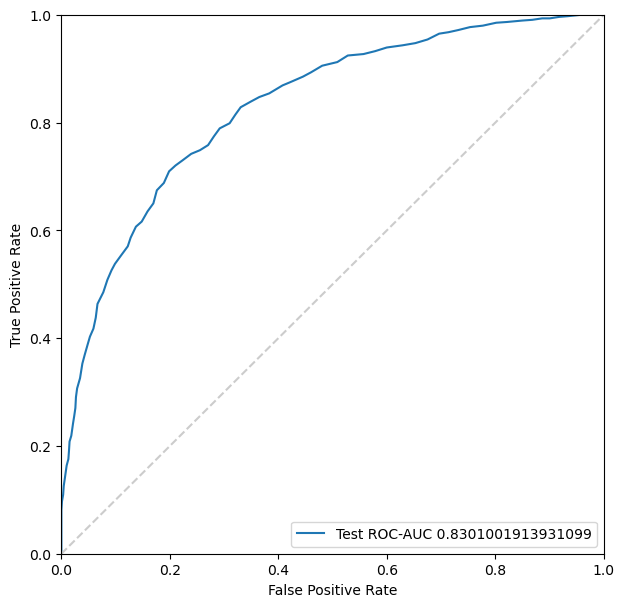

In [40]:
# здесь возьмем уже второй тип данных, когда мы применили pivot_table() для выделения трат в каждой категории
# заметим огромный скачок результата ROC-AUC

model.fit(X_train_new, y_train_new)

p_pred_new = model.predict_proba(X_test_new)[:, 1]
y_pred_new = 1*(p_pred_new >= 0.42)

roc_auc = roc_auc_score(y_test_new, p_pred_new)
accuracy = accuracy_score(y_test_new, y_pred_new)
precision = precision_score(y_test_new, y_pred_new)
recall = recall_score(y_test_new, y_pred_new)

print(f'ROC-AUC = {roc_auc}', f'Accuracy = {accuracy}', f'Precision = {precision}', f'Recall = {recall}', sep='\n')

def roc_auc_pic_new(y_test_new, y_pred_new):    
    fpr_test_new, tpr_test_new, thresholds_test_new = roc_curve(y_test_new, p_pred_new)
    roc_auc_test_new = roc_auc_score(y_test_new, p_pred_new)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test_new, tpr_test_new, label='Test ROC-AUC {0}'.format(roc_auc_test_new))
    plt.plot([0, 1], [0, 1], '--', color=(0.8, 0.8, 0.8))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');
    
    
roc_auc_pic_new(y_test_new, p_pred_new)

{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
0.8404406946380278
ROC-AUC = 0.845943771024243
Accuracy = 0.7458133971291866
Precision = 0.6666666666666666
Recall = 0.8513513513513513


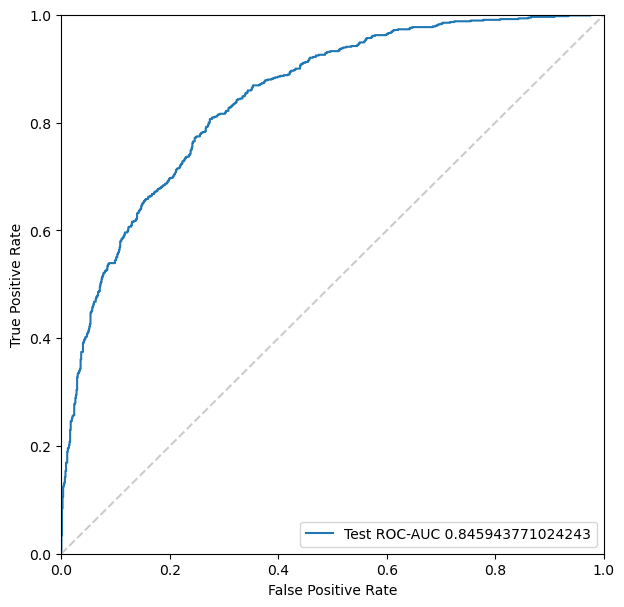

In [41]:
# если добавить чуть больше параметров, то увеличим результат практически на 2 единицы
# из-за того, что у меня комп железом не вышел, не стал  добавлять слишком много параметров 

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', 'auto'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, scoring='roc_auc', param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train_scaled)

print(grid_search.best_params_)
print(grid_search.best_score_)

best_model = grid_search.best_estimator_

p_pred_scaled = grid_search.predict_proba(X_test_scaled)[:, 1]
y_pred_scaled = 1*(p_pred_scaled >= 0.42) 
roc_auc = roc_auc_score(y_test_scaled, p_pred_scaled)
accuracy = accuracy_score(y_test_scaled, y_pred_scaled)
precision = precision_score(y_test_scaled, y_pred_scaled)
recall = recall_score(y_test_scaled, y_pred_scaled)

print(f'ROC-AUC = {roc_auc}', f'Accuracy = {accuracy}', f'Precision = {precision}', f'Recall = {recall}', sep='\n')

def roc_auc_pic_new(y_test_scaled, y_pred_scaled):    
    fpr_test_new, tpr_test_new, thresholds_test_new = roc_curve(y_test_scaled, p_pred_scaled)
    roc_auc_test_new = roc_auc_score(y_test_scaled, p_pred_scaled)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr_test_new, tpr_test_new, label='Test ROC-AUC {0}'.format(roc_auc_test_new))
    plt.plot([0, 1], [0, 1], '--', color=(0.8, 0.8, 0.8))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right');
    
    
roc_auc_pic_new(y_test_scaled, p_pred_scaled)